# Trade Markets Analytics

# 1.Introduction

select * from users;


select * from trades;


select count(*) from users;

select count(*) from trades where login_hash in (select login_hash from users);


select count(*) from trades;-- where login_hash in (select login_hash from users);
select count(*) from trades t inner join users u on t.login_hash = u.login_hash; -- where login_hash in (select login_hash from users);



In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
users = pd.read_csv('/content/Users.csv')
trades = pd.read_csv('/content/Trades.csv')

# 1.1 Users

In [89]:
users.head()

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
3,DEFB729116227EF8582BFEC65F998489,76791A893BDB9A68E8EE44898D581A60,103357E3E40A9C0E4E9D36110F7BBC7A,USD,1
4,9EAD9A73AA6C93823C56BB8C2E798B45,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


In [90]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   login_hash    1000 non-null   object
 1   server_hash   1000 non-null   object
 2   country_hash  1000 non-null   object
 3   currency      1000 non-null   object
 4   enable        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [91]:
servers = users['server_hash'].unique()
print('Number of unique server:',len(servers))
country = users['country_hash'].unique()
print('Number of unique countries:',len(country))

Number of unique server: 3
Number of unique countries: 19


In [92]:
users['enable'].value_counts()

1    973
0     27
Name: enable, dtype: int64

In [93]:
cur = users['currency'].value_counts().to_frame('Count')
cur

,Count
USD,906
AUD,91
NZD,2
EUR,1


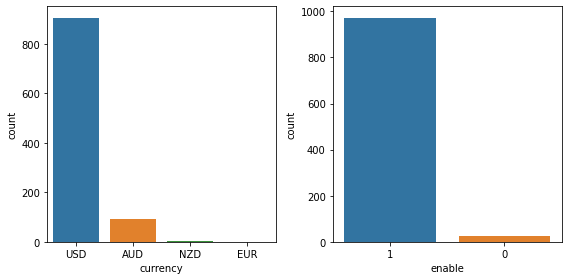

In [94]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index)
plt.subplot(1,2,2)
sns.countplot(data = users, x='enable',order=users['enable'].value_counts().index)
plt.tight_layout()
plt.show()

#1.2 Trades

In [95]:
trades.head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0
3,E62BE617269467931F2239C2771605C2,363723A73A926A7434E815F2F1D5ED61,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,10,2020-08-28 02:46:57,1926.68000,2020-08-28 02:51:13,100.0
4,54D2B4C5ECAE5FBC316524329846F81E,9CD4110328DA4CD71FFE0BE486D51094,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,85,2020-08-11 09:27:28,1999.12000,2020-08-11 09:27:54,100.0


In [96]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login_hash    100000 non-null  object 
 1   ticket_hash   100000 non-null  object 
 2   server_hash   100000 non-null  object 
 3   symbol        100000 non-null  object 
 4   digits        100000 non-null  int64  
 5   cmd           100000 non-null  int64  
 6   volume        100000 non-null  int64  
 7   open_time     100000 non-null  object 
 8   open_price    100000 non-null  float64
 9   close_time    100000 non-null  object 
 10  contractsize  99993 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


In [97]:
trades.describe()

,digits,cmd,volume,open_price,contractsize
count,100000.000000,100000.000000,100000.000000,100000.000000,99993.000000
mean,3.214250,0.448170,17.986650,1262.544975,44856.840239
std,1.463171,0.497309,100.438786,2585.110285,49669.111281
min,0.000000,0.000000,0.000000,0.591670,1.000000
25%,2.000000,0.000000,1.000000,1.190937,100.000000
50%,2.000000,0.000000,3.000000,1887.590000,100.000000
75%,5.000000,1.000000,10.000000,1967.152500,100000.000000
max,5.000000,1.000000,10000.000000,28795.000000,100000.000000


In [98]:
#sns.pairplot(trades)

In [99]:
trades['close_time'] = pd.to_datetime(trades['close_time'])
trades['open_time'] = pd.to_datetime(trades['open_time'])

In [100]:
trades['cmd'] = trades['cmd'].astype(np.object)

In [101]:
trades['time_duration'] = trades['close_time']-trades['open_time']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


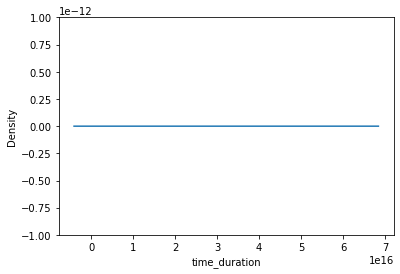

In [102]:
sns.distplot(trades['time_duration'])

In [117]:
trades['open_year'] = trades['open_time'].dt.year
trades['close_year'] = trades['close_time'].dt.year
trades['open_month'] = trades['open_time'].dt.month
trades['close_month'] = trades['close_time'].dt.month
trades['open_day'] = trades['open_time'].dt.day
trades['close_day'] = trades['close_time'].dt.day
trades['open_hr'] = trades['open_time'].dt.hour
trades['close_hr'] = trades['close_time'].dt.hour
trades['open_min'] = trades['open_time'].dt.minute
trades['close_min'] = trades['close_time'].dt.minute
trades['open_sec'] = trades['open_time'].dt.second
trades['close_sec'] = trades['close_time'].dt.second

In [104]:
trades['close_year'].value_counts()

2020    95142
2022     4780
2021       78
Name: close_year, dtype: int64

In [105]:
#trades['time_diff_day'] = trades['time_duration'].values.astype('datetime64[D]')

In [106]:
#trades['time_duration'].days

In [108]:
#trades['time_diff_day']

In [118]:
df = pd.merge(users, trades, how='inner', on='login_hash')

In [119]:
df.shape

(36067, 28)

In [120]:
df.head()

,login_hash,server_hash_x,country_hash,currency,enable,ticket_hash,server_hash_y,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,time_duration,open_year,close_year,open_month,close_month,open_day,close_day,open_hr,close_hr,open_min,close_min,open_sec,close_sec
0,A244C34BC761A97487485F0FF5A43A49,3D1F7E00251C43107EF39F55300781DB,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,3D1F7E00251C43107EF39F55300781DB,CHFJPY,3,1,1,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0,0 days 00:02:22,2020,2020,8,8,12,12,15,15,53,55,30,52
1,A244C34BC761A97487485F0FF5A43A49,3D1F7E00251C43107EF39F55300781DB,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,3D1F7E00251C43107EF39F55300781DB,AUDNZD,5,0,5,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0,0 days 03:23:04,2020,2020,8,8,31,31,8,12,54,17,34,38
2,A244C34BC761A97487485F0FF5A43A49,3D1F7E00251C43107EF39F55300781DB,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,3D1F7E00251C43107EF39F55300781DB,NZDCHF,5,1,2,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0,75 days 18:59:50,2020,2020,8,11,26,10,16,11,46,46,48,38
3,A244C34BC761A97487485F0FF5A43A49,3D1F7E00251C43107EF39F55300781DB,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,33419C6F0853738662AD6F2B4634E4FA,3D1F7E00251C43107EF39F55300781DB,AUDNZD,5,1,15,2020-08-07 09:55:24,1.08127,2020-09-18 07:20:12,100000.0,41 days 21:24:48,2020,2020,8,9,7,18,9,7,55,20,24,12
4,A244C34BC761A97487485F0FF5A43A49,3D1F7E00251C43107EF39F55300781DB,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,F59719624F9069434028DC77BD2C27A6,3D1F7E00251C43107EF39F55300781DB,GBPAUD,5,1,1,2020-08-27 15:40:42,1.81941,2020-08-27 16:58:55,100000.0,0 days 01:18:13,2020,2020,8,8,27,27,15,16,40,58,42,55
